In [67]:
# Your code here - remember to use markdown cells for comments as well!
#Arun Malik
#Full time
#Dec 16th 2022 
#Praveen Gowtham

In [68]:
#The stakeholder for this project is areal estate agency that helps homeowners 
#buy and/or sell homes. The agency provides advice to homeowners about how home renovations 
#might increase the estimated value of their homes and by what amount. 

In [69]:
import pandas as pd
import numpy as np
from numpy import absolute
from scipy import stats
import matplotlib.pyplot as plt 
import plotly.express as px
import seaborn as sns
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import re

In [70]:
#read the data from the csv file into a dataframe 
df = pd.read_csv('/Users/arun/Desktop/Flatiron/Phase2Project/data/kc_house_data.csv')

In [71]:
#getting infomation about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [72]:
#some outliers, 33 bedrooms looks interesting 
df.describe()

id         price      bedrooms     bathrooms   sqft_living  \
count  2.159700e+04  2.159700e+04  21597.000000  21597.000000  21597.000000   
mean   4.580474e+09  5.402966e+05      3.373200      2.115826   2080.321850   
std    2.876736e+09  3.673681e+05      0.926299      0.768984    918.106125   
min    1.000102e+06  7.800000e+04      1.000000      0.500000    370.000000   
25%    2.123049e+09  3.220000e+05      3.000000      1.750000   1430.000000   
50%    3.904930e+09  4.500000e+05      3.000000      2.250000   1910.000000   
75%    7.308900e+09  6.450000e+05      4.000000      2.500000   2550.000000   
max    9.900000e+09  7.700000e+06     33.000000      8.000000  13540.000000   

           sqft_lot        floors    sqft_above      yr_built  yr_renovated  \
count  2.159700e+04  21597.000000  21597.000000  21597.000000  17755.000000   
mean   1.509941e+04      1.494096   1788.596842   1970.999676     83.636778   
std    4.141264e+04      0.539683    827.759761     29.375234    399.946414   
min    5.200000e+02      1.000000    370.000000   1900.000000      0.000000   
25%    5.040000e+03      1.000000   1190.000000   1951.000000      0.000000   
50%    7.618000e+03      1.500000   1560.000000   1975.000000      0.000000   
75%    1.068500e+04      2.000000   2210.000000   1997.000000      0.000000   
max    1.651359e+06      3.500000   9410.000000   2015.000000   2015.000000   

            zipcode           lat          long  sqft_living15     sqft_lot15  
count  21597.000000  21597.000000  21597.000000   21597.000000   21597.000000  
mean   98077.951845     47.560093   -122.213982    1986.620318   12758.283512  
std       53.513072      0.138552      0.140724     685.230472   27274.441950  
min    98001.000000     47.155900   -122.519000     399.000000     651.000000  
25%    98033.000000     47.471100   -122.328000    1490.000000    5100.000000  
50%    98065.000000     47.571800   -122.231000    1840.000000    7620.000000  
75%    98118.000000     47.678000   -122.125000    2360.000000   10083.000000  
max    98199.000000     47.777600   -121.315000    6210.000000  871200.000000

In [73]:
#find sum of null values in the dataset 
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [74]:
#going to fill null values with 0. Don't want to lose too much data 
df = df.fillna(0)

In [75]:
#There are mutiple categorical variables that need to be converted to numerical
#in order to be used in a linear regression model

In [76]:
#convert date column to datetime 
df['date'] =  pd.to_datetime(df['date'], infer_datetime_format=True)

In [77]:
#Waterfront is a no/yes value and can be chanhed to 0/l for modeling
mapping = {0:0, 'NO':1, 'YES':2}

df['waterfront'] = df['waterfront'].map(mapping )

In [78]:
#Condition, view and grade are ordinal variables that need to be converted to numeric for 
#the regression model.

view_mapping = {0:0, "NONE": 1, "FAIR":2, "AVERAGE":3, "GOOD":4, "EXCELLENT":5}
df['view'] = df['view'].map(view_mapping)


condition_mapping = {"Poor":0, "Fair":1, "Average":2, "Good":3, "Very Good":4}
df['condition'] = df['condition'].map(condition_mapping)


grade_mapping = {'3 Poor':0, "4 Low": 1, '5 Fair':2, '6 Low Average':3,
                 '7 Average':4, '8 Good':5, '9 Better':6, '10 Very Good':7, '11 Excellent':8,
                 '12 Luxury':9, '13 Mansion':10}

df['grade'] = df['grade'].map(grade_mapping)

In [79]:
#getting an inital sense of what variables we would want to keep
df[df.columns[1:]].corr()['price'][:].sort_values(ascending = False)

price            1.000000
sqft_living      0.701917
grade            0.667951
sqft_above       0.605368
sqft_living15    0.585241
bathrooms        0.525906
view             0.391223
bedrooms         0.308787
lat              0.306692
floors           0.256804
yr_renovated     0.117855
sqft_lot         0.089876
sqft_lot15       0.082845
waterfront       0.076476
yr_built         0.053953
condition        0.036056
long             0.022036
zipcode         -0.053402
Name: price, dtype: float64

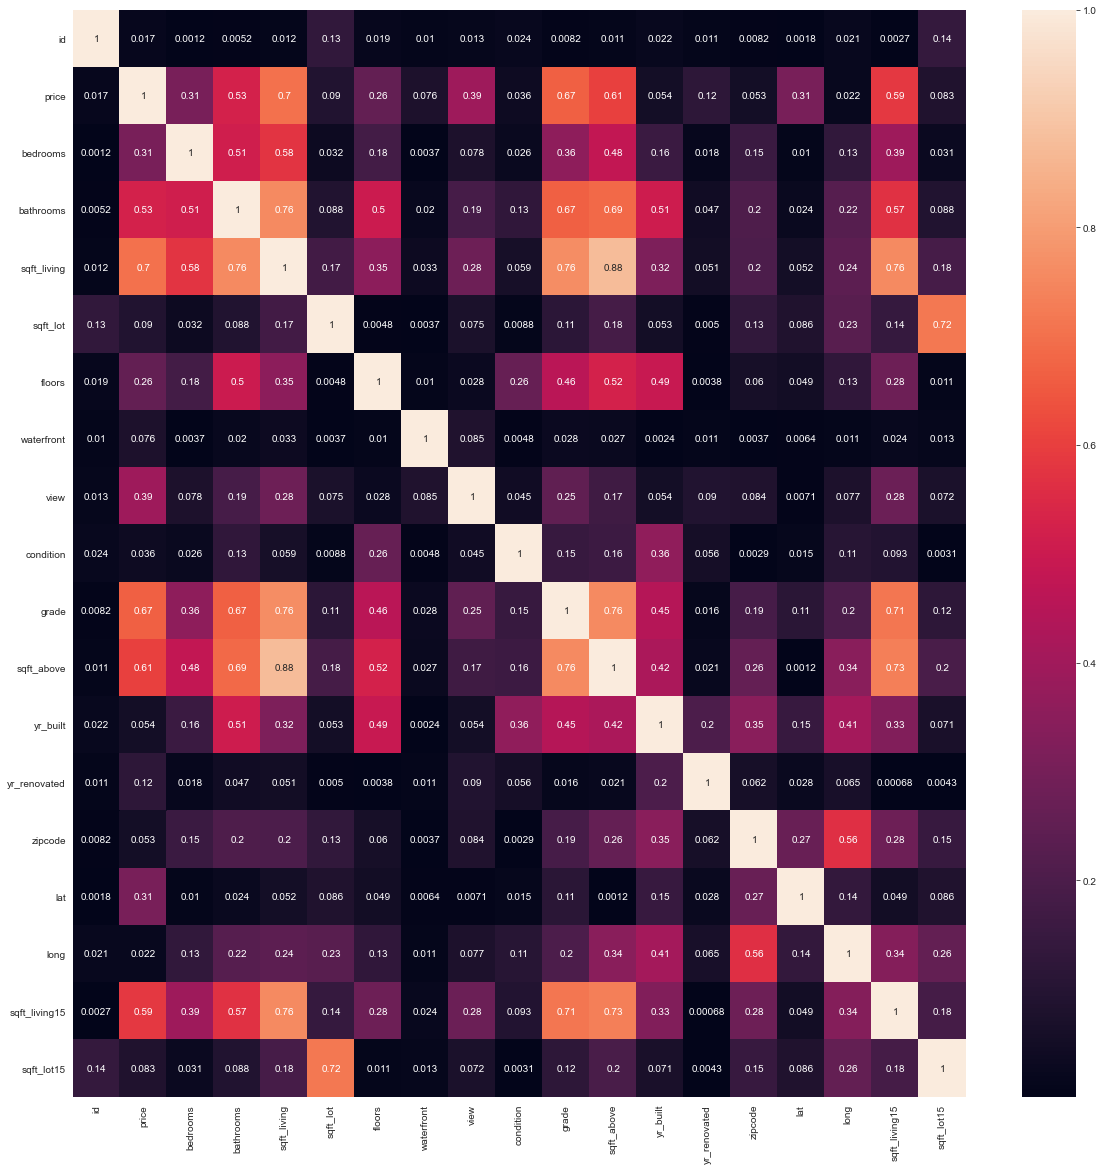

In [80]:
#get a visualization of correlation on price
plt.figure(figsize=(20,20))
sns.heatmap(df.corr().abs(), annot=True)
plt.show()

## Data visualization and transformations

In [81]:
#Price is right skewed and needs to be log transformed to normalize
fig = px.histogram(df, x="price", nbins = 100)
fig.update_layout(xaxis_title="Price", yaxis_title="Count", title='Count of Houses by Price')
fig.show()

In [82]:
#Taking the log of price will help normalize the data
df['log_price'] = np.log(df['price'])
fig.update_layout(xaxis_title="Log of Price", yaxis_title="Count", 
                  title='Count of Houses by Log of Price')
fig = px.histogram(df, x="log_price", nbins = 100)
fig.show()

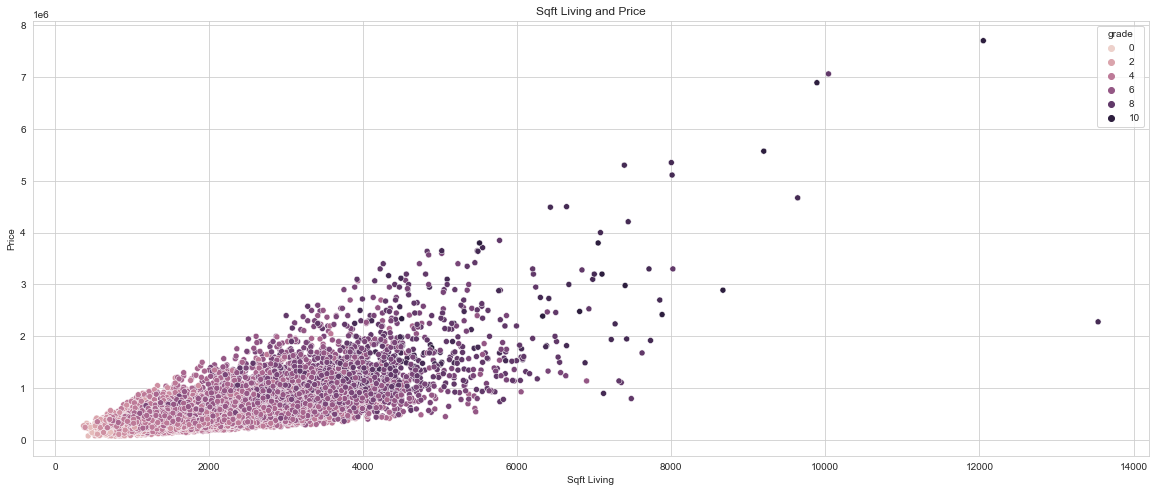

In [83]:
plt.figure(figsize=(20,8))
sns.set_style(style='whitegrid')
sns.scatterplot(x="sqft_living", y="price", data=df, hue='grade')
plt.title('Sqft Living and Price')
plt.xlabel('Sqft Living')
plt.ylabel('Price')

plt.show()

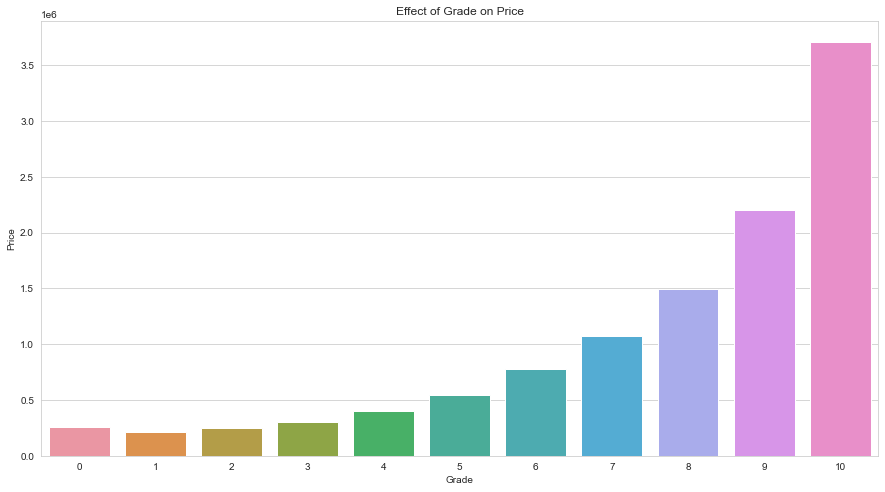

In [84]:
#get the average price by grade
grouped_grade = df.groupby('grade')['price'].agg(np.mean)
grouped_grade = grouped_grade.reset_index()

#Graph the average home price by grade
plt.figure(figsize=(15,8))
fig = sns.barplot(x=grouped_grade['grade'], y=grouped_grade['price'])
plt.title('Effect of Grade on Price')
plt.xlabel('Grade')
plt.ylabel('Price')

plt.show()

In [85]:
#get the average price by number of bathrooms
grouped_bathroom = df.groupby('bathrooms')['price'].agg(np.mean)
grouped_bathroom = grouped_bathroom.reset_index()

#Graph the average home price by number of bathrooms
fig = px.bar(x=grouped_bathroom['bathrooms'], y=grouped_bathroom['price'])
fig.update_layout(xaxis_title="Number of Bathrooms", yaxis_title="Price"
                  ,title='Average Price by number of bathrooms')
fig.show() 

In [86]:
#get the average price by grade
grouped_view = df.groupby('view')['price'].agg(np.mean)
grouped_view = grouped_view.reset_index()

#fig = px.scatter(df, x=df.view, y=df.price, labels={'View':'Price'},
#             title='Price vs View', color='view')
#fig.show()

#Graph the average home price by grade
fig = px.bar(x=grouped_view['view'], y=grouped_view['price'])
fig.update_layout(xaxis_title="View", yaxis_title="Price", title='Average Price by View')
fig.show() 

In [87]:
#dropping the outiler 33 bedroom house but relatively low price. 
#could be mistyped data, might only be 3 bedrooms 

df.drop(df[df['bedrooms'] >= 15].index, inplace = True)

#plot bedrooms and price 
fig = px.scatter(df, x=df.bedrooms, y=df.price, labels={'Bedrooms':'Price'},
             title='Price vs Bedrooms', color='bedrooms')
fig.show()

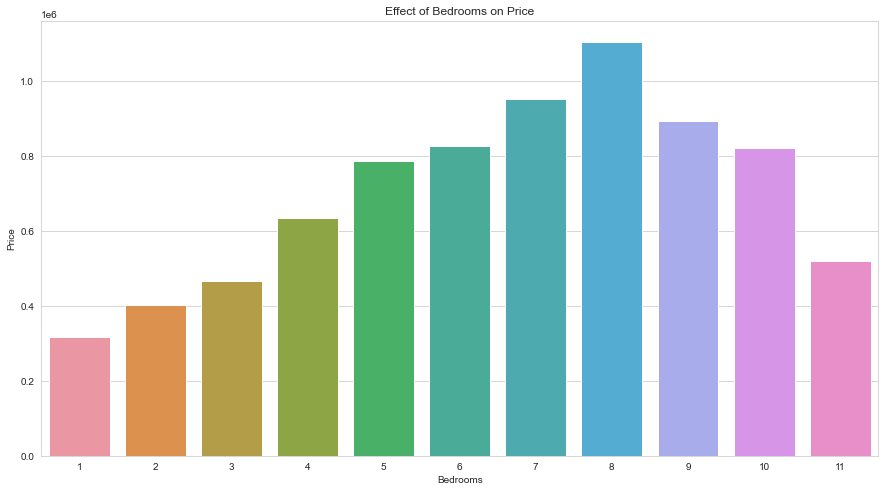

In [88]:
#get the average price by grade
grouped_bedrooms = df.groupby('bedrooms')['price'].agg(np.mean)
grouped_bedrooms = grouped_bedrooms.reset_index()

#Graph the average home price by bedroom
#Perhaps more then 8 bedrooms makes the house feel cramped 
plt.figure(figsize=(15,8))
fig = sns.barplot(x=grouped_bedrooms['bedrooms'], y=grouped_bedrooms['price'])
plt.title('Effect of Bedrooms on Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

plt.show()

In [89]:
fig = px.scatter(df, x=df.zipcode, y=df.price, labels={'Zipcode':'Price'},
             title='Price vs Zipcode', color='zipcode')

fig.show()

In [90]:
#get the average price by zipcode. This chart is difficult to read, so I'll just focus on the top 10
grouped_zipcode = df.groupby('zipcode')['price'].agg(np.mean)
grouped_zipcode = grouped_zipcode.reset_index()
grouped_zipcode = grouped_zipcode.sort_values('price', ascending = False)

#Graph the average home price by grade
fig = px.bar(x=grouped_zipcode['zipcode'], y=grouped_zipcode['price'], width=850, height=400)
fig.update_layout(xaxis_title="Zipcode", yaxis_title="Price", 
                  title='Average Price by Zipcode')
fig.show() 

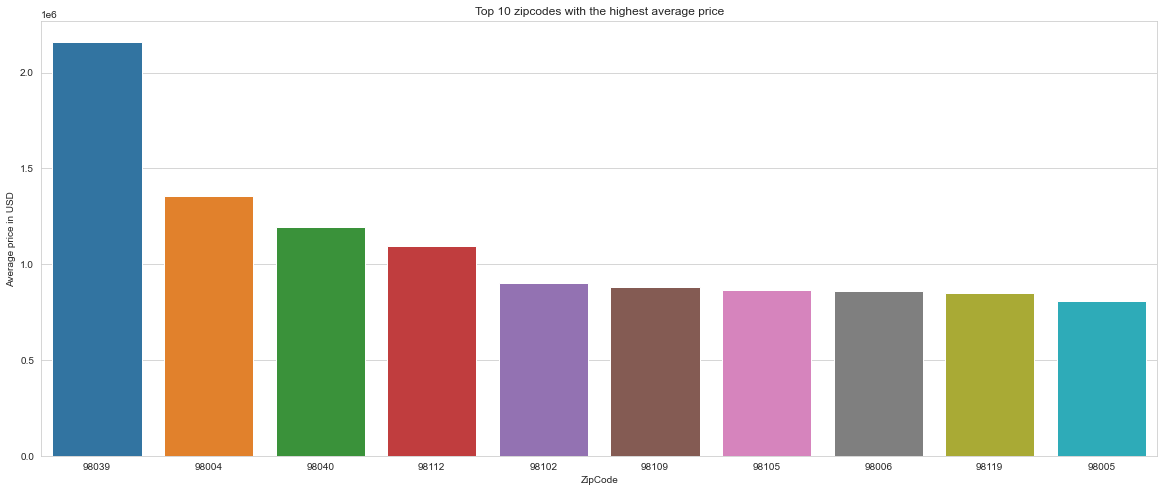

In [91]:
#Top 10 zipcodes mean price in USD. 
Top10Zipcodes = grouped_zipcode.head(10)

plt.figure(figsize=(20,8))
sns.barplot(x = Top10Zipcodes['zipcode'], y = Top10Zipcodes['price'], order = Top10Zipcodes['zipcode'].values.tolist())
plt.title("Top 10 zipcodes with the highest average price")
plt.ylabel("Average price in USD")
plt.xlabel('ZipCode')
plt.show()

In [92]:
#group by zipcode and grade to see what the relationship. 
#grade 7 and higher are good quality construction
grouped_multiple = df.groupby(['zipcode', 'grade']).agg({'price': ['mean', 'min', 'max']})
grouped_multiple.columns = ['price_mean', 'price_min', 'price_max']
grouped_multiple = grouped_multiple.reset_index()
grouped_multiple.sort_values('grade', ascending = False)

zipcode  grade  price_mean  price_min  price_max
491    98199     10   3200000.0  3200000.0  3200000.0
243    98059     10   1780000.0  1780000.0  1780000.0
38     98006     10   2660000.0  2340000.0  2980000.0
23     98004     10   3800000.0  3800000.0  3800000.0
303    98102     10   5090000.0  2480000.0  7700000.0
..       ...    ...         ...        ...        ...
103    98027      1    189000.0   130000.0   248000.0
226    98058      1    200000.0   200000.0   200000.0
94     98024      1    205000.0   205000.0   205000.0
422    98146      1    235000.0   145000.0   325000.0
79     98022      0    262000.0   262000.0   262000.0

[492 rows x 5 columns]

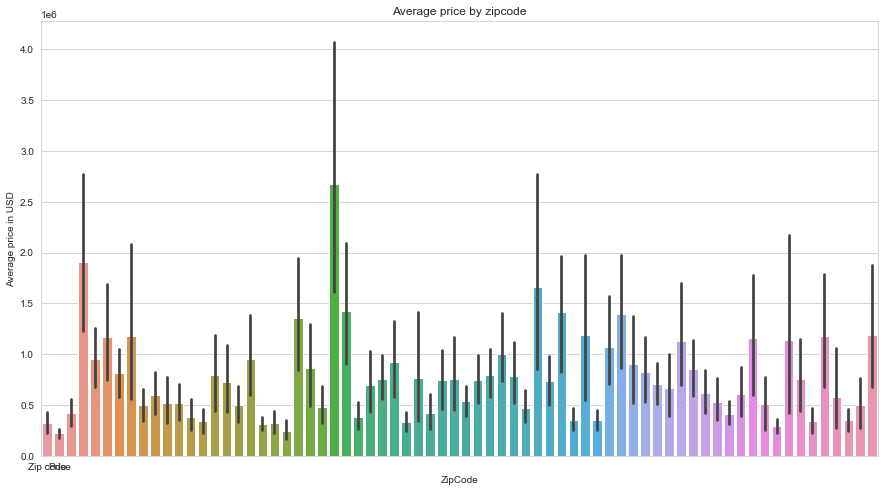

In [93]:
plt.figure(figsize=(15,8))
sns.barplot(x = grouped_multiple['zipcode'], y = grouped_multiple['price_mean'])
plt.title("Average price by zipcode")
plt.ylabel("Average price in USD")
plt.xlabel('ZipCode')
plt.xticks(np.arange(2), ('Zip code', 'Price'))
plt.show()

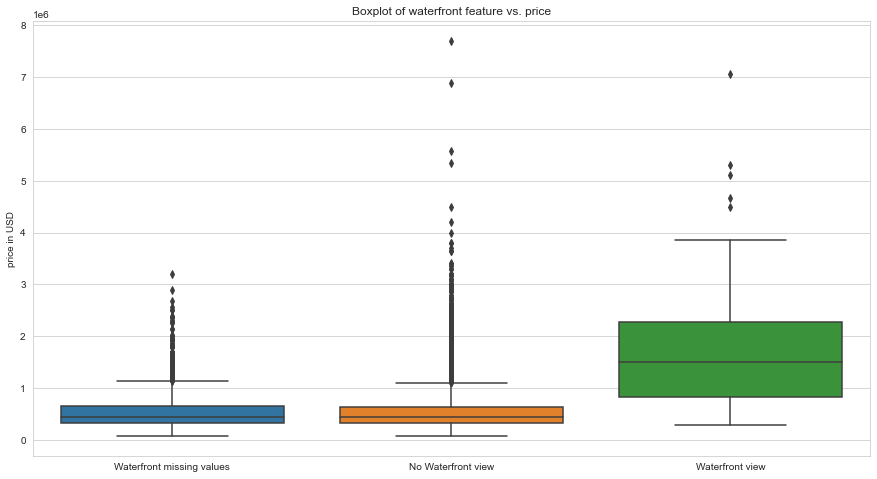

In [94]:
# Houses with a waterfrong are more expensive, not surprising 
plt.figure(figsize=(15,8))
sns.boxplot(x = df['waterfront'], y = df['price'])
plt.title("Boxplot of waterfront feature vs. price")
plt.ylabel("price in USD")
plt.xlabel(None)
plt.xticks(np.arange(3), ('Waterfront missing values', 'No Waterfront view', 'Waterfront view'))
plt.show()

In [95]:
#Renovating the house does have an effect on price but not as big as I assumed it would be
fig = px.scatter(df, x=df.yr_renovated, y=df.price, labels={'Zipcode':'Price'},
             title='Renovation effect on Price', color='yr_renovated')

fig.show()

## Create lists for the train test model

In [96]:
#creating lists of variables to use for Model usage

all_features =  ['sqft_living','grade','sqft_above','sqft_living15','bathrooms',
                 'view','bedrooms','lat','waterfront','floors', 'yr_renovated',
                 'sqft_lot','sqft_lot15','yr_built','condition','long','zipcode']

high_corr = ['sqft_living','grade','sqft_above','sqft_living15','bathrooms',
             'view','bedrooms','waterfront','floors','zipcode']

zipcode_living = ['sqft_living','zipcode']

sqft_grade = ['sqft_living','grade', 'sqft_above']

## Model with high corr variables

In [97]:
#create a train_test model, give it just features that are highly correlated
X = df[high_corr]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [98]:
#create a OneHotEncoder object, create arrays for categoricals and labels
ohe = OneHotEncoder(handle_unknown='ignore')
feature_array = ohe.fit_transform(X_train[['zipcode']]).toarray()
feature_labels = ohe.categories_

#combine all arryas into one array
feature_labels = np.array(feature_labels).ravel()
feature_labels = np.hstack(feature_labels)

#creating a dataframe of all features including OneHotEncoder
feature_dataframe = pd.DataFrame(feature_array, columns = feature_labels)

#reset the index to match dataframe shapes
feature_dataframe.index = X_train.index

#combining the dataframes 
X_train = pd.concat([X_train, feature_dataframe], 1)

#dropping the catergory columns for which OneHotEncoder were made
X_train.drop(['zipcode'], axis = 1, inplace = True)

In [99]:
#run the same process to X_test but without the .fit
feature_array_test = ohe.transform(X_test[['zipcode']]).toarray()
feature_labels_test = ohe.categories_

#combine all arryas into one array
feature_labels_test = np.array(feature_labels_test).ravel()
feature_labels_test = np.hstack(feature_labels_test)

#creating a dataframe of all features including OneHotEncoder
feature_dataframe_test = pd.DataFrame(feature_array_test, columns = feature_labels_test)

#reset the index to match dataframe shapes
feature_dataframe_test.index = X_test.index

#combining the dataframes 
X_test = pd.concat([X_test, feature_dataframe_test], 1)

#dropping the catergory columns for which OneHotEncoder were made
X_test.drop(['zipcode'], axis = 1, inplace = True)

In [100]:
#since our varaibles are in different mesasures, we have to standardize the data. 
ss = StandardScaler()
ss.fit(X_train)
X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

In [101]:
#running the first regression model with all the features.
model_high_corr = LinearRegression()
model_high_corr.fit(X_train, y_train)
print(model_high_corr.score(X_train,y_train))
print(model_high_corr.intercept_, model_high_corr.score(X_test, y_test))
results = pd.DataFrame(zip(X.columns, model_high_corr.coef_))

0.7845862975677017
58592625769471.2 0.7813683750761602


In [102]:
results

0             1
0    sqft_living  1.423010e+02
1          grade  4.999392e+04
2     sqft_above  8.228229e+01
3  sqft_living15  4.334325e+00
4      bathrooms  1.088235e+04
5           view  8.797149e+04
6       bedrooms -3.115914e+04
7     waterfront  4.884088e+04
8         floors -6.281676e+04
9        zipcode -5.859263e+13

In [103]:
#Observations:
# - 78.13% variation in Y is predicted by the model  
# - The top precitor variables are sqft_living, grade and sqft_above
# - The model is using Log of price so all coefficients are percent base changes. 

## Model2 with only zipcode and sqft_living

In [104]:
#create a train_test model. This time just using zipcodes and sqft_living
X = df[zipcode_living]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [105]:
#create a OneHotEncoder object, create arrays for categoricals and labels
ohe = OneHotEncoder(handle_unknown='ignore')
feature_array = ohe.fit_transform(X_train[['zipcode']]).toarray()
feature_labels = ohe.categories_

#combine all arryas into one array
feature_labels = np.array(feature_labels).ravel()
feature_labels = np.hstack(feature_labels)

#creating a dataframe of all features including OneHotEncoder
feature_dataframe = pd.DataFrame(feature_array, columns = feature_labels)

#reset the index to match dataframe shapes
feature_dataframe.index = X_train.index

#combining the dataframes 
X_train = pd.concat([X_train, feature_dataframe], 1)

#dropping the catergory columns for which OneHotEncoder were made
X_train.drop(['zipcode'], axis = 1, inplace = True)

In [106]:
#run the same process to X_test but without the .fit
feature_array_test = ohe.transform(X_test[['zipcode']]).toarray()
feature_labels_test = ohe.categories_

#combine all arryas into one array
feature_labels_test = np.array(feature_labels_test).ravel()
feature_labels_test = np.hstack(feature_labels_test)

#creating a dataframe of all features including OneHotEncoder
feature_dataframe_test = pd.DataFrame(feature_array_test, columns = feature_labels_test)

#reset the index to match dataframe shapes
feature_dataframe_test.index = X_test.index

#combining the dataframes 
X_test = pd.concat([X_test, feature_dataframe_test], 1)

#dropping the catergory columns for which OneHotEncoder were made
X_test.drop(['zipcode'], axis = 1, inplace = True)

In [107]:
ss = StandardScaler()
ss.fit(X_train)
X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

In [108]:
#running the first regression model with all the features.
model_zipcode_living = LinearRegression()
model_zipcode_living.fit(X_train, y_train)
print(model_zipcode_living.score(X_train,y_train))
print(model_zipcode_living.intercept_, model_zipcode_living.score(X_test, y_test))
pd.DataFrame(zip(X.columns, model_zipcode_living.coef_))

0.7273029829928378
-23359341672402.906 0.7347760577528235


0             1
0  sqft_living  2.501074e+02
1      zipcode  2.335934e+13

In [109]:
# A near 5% drop from the high corr model is a big gap. Going to add only variables 
# to see if we get better results.

## All Features Model

In [110]:
#create a train_test model, give it all the features. This is the base model
X = df[all_features]
y = df['log_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 50)

In [111]:
#create a OneHotEncoder object, create arrays for categoricals and labels
ohe = OneHotEncoder(handle_unknown='ignore')
feature_array = ohe.fit_transform(X_train[['zipcode']]).toarray()
feature_labels = ohe.categories_

#combine all arryas into one array
feature_labels = np.array(feature_labels).ravel()
feature_labels = np.hstack(feature_labels)

#creating a dataframe of all features including OneHotEncoder
feature_dataframe = pd.DataFrame(feature_array, columns = feature_labels)

#reset the index to match dataframe shapes
feature_dataframe.index = X_train.index

#combining the dataframes 
X_train = pd.concat([X_train, feature_dataframe], 1)

#dropping the catergory columns for which OneHotEncoder were made
X_train.drop(['zipcode'], axis = 1, inplace = True)

In [112]:
#run the same process to X_test but without the .fit
feature_array_test = ohe.transform(X_test[['zipcode']]).toarray()
feature_labels_test = ohe.categories_

#combine all arryas into one array
feature_labels_test = np.array(feature_labels_test).ravel()
feature_labels_test = np.hstack(feature_labels_test)

#creating a dataframe of all features including OneHotEncoder
feature_dataframe_test = pd.DataFrame(feature_array_test, columns = feature_labels_test)

#reset the index to match dataframe shapes
feature_dataframe_test.index = X_test.index

#combining the dataframes 
X_test = pd.concat([X_test, feature_dataframe_test], 1)

#dropping the catergory columns for which OneHotEncoder were made
X_test.drop(['zipcode'], axis = 1, inplace = True)

In [113]:
ss = StandardScaler()
ss.fit(X_train)
X_standardized_train = ss.transform(X_train)
X_standardized_test = ss.transform(X_test)

In [114]:
#running the first regression model with all the features.
aplha = 0.05
model_all_features = LinearRegression()
model_all_features.fit(X_train, y_train)
print(model_all_features.score(X_train,y_train))
print(model_all_features.intercept_,  model_all_features.score(X_test, y_test))
results = pd.DataFrame(zip(X.columns, model_all_features.coef_))

0.8716072896927897
-66.09534100897802 0.875148041074615


In [115]:
results.head()

0         1
0    sqft_living  0.000122
1          grade  0.093301
2     sqft_above  0.000074
3  sqft_living15  0.000084
4      bathrooms  0.044288

/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



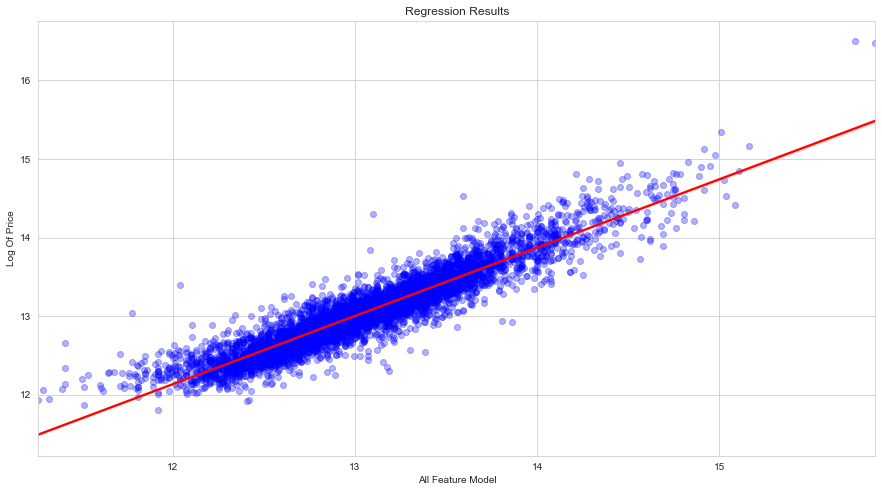

In [116]:
preds = model_all_features.predict(X_test)

plt.figure(figsize=(15,8))
sns.regplot(y_test,preds, scatter_kws={"color": "blue", 'alpha': 0.3}, line_kws={"color": "red"},  
            ci=95)
plt.title('Regression Results')
plt.xlabel('All Feature Model')
plt.ylabel('Log Of Price')

plt.show()

In [117]:
#R^2 of 87.51, a good model considering no interaction variables were used.
#The Coeeficients are based on the log of Price so they are percent based.
#Increasing the grade, adding bathrooms and increasing the sqft of living space have the 
#highest effect on increasing the price and value of the property.